In [86]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


In [87]:
df = pd.read_csv('DATA PENDUDUK DESA RUMAH KINANGKUNG SP KEC SIBOLANGIT.csv')

In [88]:
df.head()

,Nama,Dusun,JENIS KELAMIN,Pendidikan (dLm KK),Pendidikan (sdg ditemph),Pekerjaan,Umur,Kawin,Hub. Keluarga,Status
0,ERIADI BUKIT,III TANGGUREN,L,TAMAT SD / SEDERAJAT,TIDAK SEDANG SEKOLAH,PETANI/PERKEBUNAN,35.0,KAWIN,KEPALA KELUARGA,Tetap
1,SRI DAYANI BR TARIGAN,III TANGGUREN,P,SLTA / SEDERAJAT,TIDAK SEDANG SEKOLAH,PETANI/PERKEBUNAN,36.0,KAWIN,ISTRI,Tetap
2,PEBRINA JUNITA SARI BR BUKIT,III TANGGUREN,P,BELUM TAMAT SD/SEDERAJAT,TIDAK SEDANG SEKOLAH,PELAJAR/MAHASISWA,16.0,BELUM KAWIN,ANAK,Tetap
3,BRIYAN SURAMANA BUKIT,III TANGGUREN,L,BELUM TAMAT SD/SEDERAJAT,TIDAK SEDANG SEKOLAH,PELAJAR/MAHASISWA,12.0,BELUM KAWIN,ANAK,Tetap
4,MICHAYLA ZIVANA BR BUKIT,III TANGGUREN,P,TIDAK / BELUM SEKOLAH,BELUM MASUK TK/KELOMPOK BERMAIN,BELUM/TIDAK BEKERJA,4.0,BELUM KAWIN,ANAK,Tetap


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nama                      404 non-null    object 
 1   Dusun                     404 non-null    object 
 2   JENIS KELAMIN             404 non-null    object 
 3   Pendidikan (dLm KK)       404 non-null    object 
 4   Pendidikan (sdg ditemph)  289 non-null    object 
 5   Pekerjaan                 403 non-null    object 
 6   Umur                      403 non-null    float64
 7   Kawin                     403 non-null    object 
 8   Hub. Keluarga             404 non-null    object 
 9   Status                    404 non-null    object 
dtypes: float64(1), object(9)
memory usage: 31.7+ KB


In [90]:
df[df.isnull().any(axis=1)]

,Nama,Dusun,JENIS KELAMIN,Pendidikan (dLm KK),Pendidikan (sdg ditemph),Pekerjaan,Umur,Kawin,Hub. Keluarga,Status
9,CINTIA KEYSIA BR BUKIT,I RUMAHKINANGKUNG SP,P,TIDAK / BELUM SEKOLAH,NaN,BELUM/TIDAK BEKERJA,11.0,BELUM KAWIN,ANAK,Tetap
14,CHELSI NOVIAURA BR BUKIT,I RUMAHKINANGKUNG SP,P,TIDAK / BELUM SEKOLAH,NaN,BELUM/TIDAK BEKERJA,5.0,BELUM KAWIN,ANAK,Tetap
15,CAROLINA BETH CLARA BR BUKIT,I RUMAHKINANGKUNG SP,P,TIDAK / BELUM SEKOLAH,NaN,BELUM/TIDAK BEKERJA,4.0,BELUM KAWIN,ANAK,Tetap
31,ZEA EUDORA BR BUKIT,I RUMAHKINANGKUNG SP,P,TIDAK / BELUM SEKOLAH,NaN,BELUM/TIDAK BEKERJA,4.0,BELUM KAWIN,ANAK,Tetap
39,MAKMUR JAYA TARIGAN,II PERMANDIN,L,SLTA / SEDERAJAT,NaN,PETANI/PERKEBUNAN,53.0,KAWIN,KEPALA KELUARGA,Tetap
...,...,...,...,...,...,...,...,...,...,...
399,SEPTA RIANA BR TARIGAN,II PERMANDIN,P,BELUM TAMAT SD/SEDERAJAT,NaN,PELAJAR/MAHASISWA,13.0,BELUM KAWIN,ANAK,Tetap
400,MELLY RAHMAYANI BR PURBA,II PERMANDIN,P,TAMAT SD / SEDERAJAT,NaN,PELAJAR/MAHASISWA,23.0,KAWIN,ANAK,Tetap
401,SIMON TARIGAN,II PERMANDIN,L,TAMAT SD / SEDERAJAT,NaN,PETANI/PERKEBUNAN,64.0,CERAI MATI,KEPALA KELUARGA,Tetap
402,SRI ULINA BR TARIGAN,II PERMANDIN,P,BELUM TAMAT SD/SEDERAJAT,NaN,PELAJAR/MAHASISWA,26.0,BELUM KAWIN,ANAK,Tetap


In [91]:
df[df['Pekerjaan'].isnull()]

,Nama,Dusun,JENIS KELAMIN,Pendidikan (dLm KK),Pendidikan (sdg ditemph),Pekerjaan,Umur,Kawin,Hub. Keluarga,Status
360,DAPA EKA BREDIPTA TARIGAN,II PERMANDIN,L,BELUM TAMAT SD/SEDERAJAT,NaN,NaN,5.0,BELUM KAWIN,ANAK,Tetap


In [92]:
df['Pendidikan (sdg ditemph)'] = df['Pendidikan (sdg ditemph)'].fillna("Tidak Terdata")
df['Pekerjaan'] = df['Pekerjaan'].fillna("Tidak Terdata")
df['Kawin'] = df['Kawin'].fillna("Tidak Terdata")
df['Umur'] = df['Umur'].fillna(0)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nama                      404 non-null    object 
 1   Dusun                     404 non-null    object 
 2   JENIS KELAMIN             404 non-null    object 
 3   Pendidikan (dLm KK)       404 non-null    object 
 4   Pendidikan (sdg ditemph)  404 non-null    object 
 5   Pekerjaan                 404 non-null    object 
 6   Umur                      404 non-null    float64
 7   Kawin                     404 non-null    object 
 8   Hub. Keluarga             404 non-null    object 
 9   Status                    404 non-null    object 
dtypes: float64(1), object(9)
memory usage: 31.7+ KB


In [94]:
df[df['JENIS KELAMIN'] == "L"].groupby(['Pendidikan (dLm KK)']).size().sort_values(ascending=False)

Pendidikan (dLm KK)
SLTA / SEDERAJAT                53
TAMAT SD / SEDERAJAT            44
TIDAK / BELUM SEKOLAH           41
BELUM TAMAT SD/SEDERAJAT        40
SLTP/SEDERAJAT                  39
AKADEMI/ DIPLOMA III/S. MUDA     5
DIPLOMA IV/ STRATA I             3
DIPLOMA I / II                   1
dtype: int64

In [95]:
df[df['JENIS KELAMIN'] == "P"].groupby(['Pendidikan (dLm KK)']).size().sort_values(ascending=False)

Pendidikan (dLm KK)
SLTA / SEDERAJAT                46
TAMAT SD / SEDERAJAT            42
BELUM TAMAT SD/SEDERAJAT        32
TIDAK / BELUM SEKOLAH           30
SLTP/SEDERAJAT                  25
DIPLOMA IV/ STRATA I             2
AKADEMI/ DIPLOMA III/S. MUDA     1
dtype: int64

In [96]:
df.groupby(['JENIS KELAMIN','Pendidikan (dLm KK)']).size()

JENIS KELAMIN  Pendidikan (dLm KK)         
L              AKADEMI/ DIPLOMA III/S. MUDA     5
               BELUM TAMAT SD/SEDERAJAT        40
               DIPLOMA I / II                   1
               DIPLOMA IV/ STRATA I             3
               SLTA / SEDERAJAT                53
               SLTP/SEDERAJAT                  39
               TAMAT SD / SEDERAJAT            44
               TIDAK / BELUM SEKOLAH           41
P              AKADEMI/ DIPLOMA III/S. MUDA     1
               BELUM TAMAT SD/SEDERAJAT        32
               DIPLOMA IV/ STRATA I             2
               SLTA / SEDERAJAT                46
               SLTP/SEDERAJAT                  25
               TAMAT SD / SEDERAJAT            42
               TIDAK / BELUM SEKOLAH           30
dtype: int64

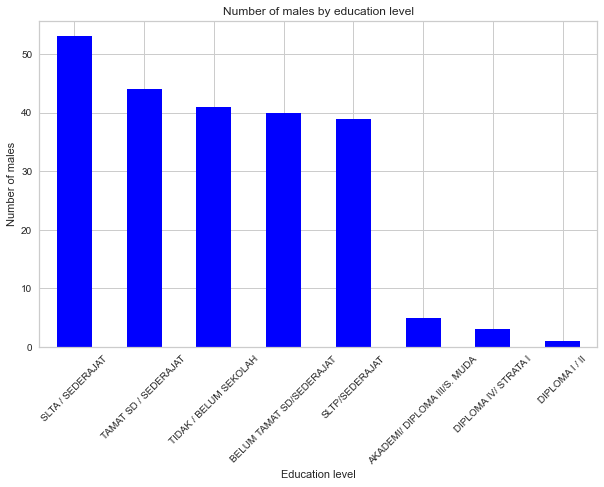

In [97]:
# Execute the code to get the data
data = df[df['JENIS KELAMIN'] == "L"].groupby(['Pendidikan (dLm KK)']).size().sort_values(ascending=False)

# Create a bar plot
ax = data.plot(kind='bar', figsize=(10, 6), color='blue')

# Set properties for the plot
ax.set_title("Number of males by education level")
ax.set_xlabel("Education level")
ax.set_ylabel("Number of males")
ax.tick_params(axis='x', labelrotation=45)

# Display the plot
plt.show()

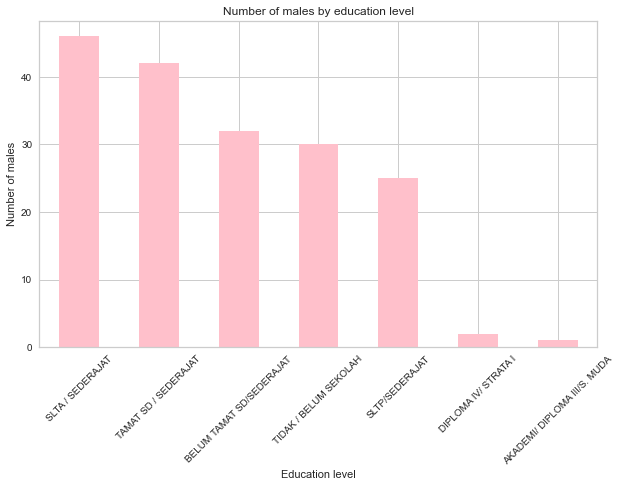

In [111]:
# Execute the code to get the data
data = df[df['JENIS KELAMIN'] == "P"].groupby(['Pendidikan (dLm KK)']).size().sort_values(ascending=False)

# Create a bar plot
ax = data.plot(kind='bar', figsize=(10, 6), color='Pink')

# Set properties for the plot
ax.set_title("Number of males by education level")
ax.set_xlabel("Education level")
ax.set_ylabel("Number of males")
ax.tick_params(axis='x', labelrotation=45)

# Display the plot
plt.show()

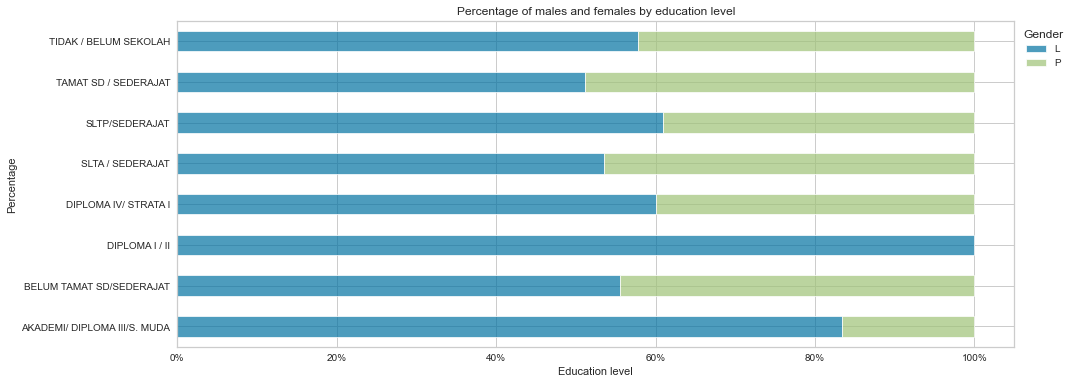

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Execute the code to get the data
data = df.groupby(['Pendidikan (dLm KK)', 'JENIS KELAMIN']).size().unstack()

# Normalize the data to get percentages
data = data.div(data.sum(axis=1), axis=0)

# Create a stacked 100% bar plot
ax = data.plot(kind='barh', stacked=True, figsize=(15, 6), width=0.5, edgecolor='white', linewidth=1, alpha=0.7, rot=0)

# Set properties for the plot
ax.set_title("Percentage of males and females by education level")
ax.set_xlabel("Education level")
ax.set_ylabel("Percentage")
# ax.tick_params(axis='x', labelrotation=45)
ax.legend(title='Gender', bbox_to_anchor=(1.0, 1.0))

# Format the labels to show percentages
formatter = FuncFormatter(lambda y, pos: f'{y:.0%}')
ax.xaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nama                      404 non-null    object 
 1   Dusun                     404 non-null    object 
 2   JENIS KELAMIN             404 non-null    object 
 3   Pendidikan (dLm KK)       404 non-null    object 
 4   Pendidikan (sdg ditemph)  404 non-null    object 
 5   Pekerjaan                 404 non-null    object 
 6   Umur                      404 non-null    float64
 7   Kawin                     404 non-null    object 
 8   Hub. Keluarga             404 non-null    object 
 9   Status                    404 non-null    object 
dtypes: float64(1), object(9)
memory usage: 31.7+ KB


In [101]:
df.describe()

,Umur
count,404.000000
mean,35.829208
std,20.747640
min,0.000000
25%,17.000000
50%,35.500000
75%,53.000000
max,84.000000


In [117]:
import plotly.express as px

# Execute the code to get the data
age_counts = df[df["JENIS KELAMIN"] == "L"]["Umur"].value_counts()

# Create a bar chart using Plotly
fig = px.bar(age_counts, title="Age of male respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [116]:
# Execute the code to get the data
age_counts = df[df["JENIS KELAMIN"] == "P"]["Umur"].value_counts()

# Create a bar chart using Plotly
fig = px.bar(age_counts, title="Age of female respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

JENIS KELAMIN
L    AxesSubplot(0.125,0.125;0.775x0.755)
P    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Umur, dtype: object

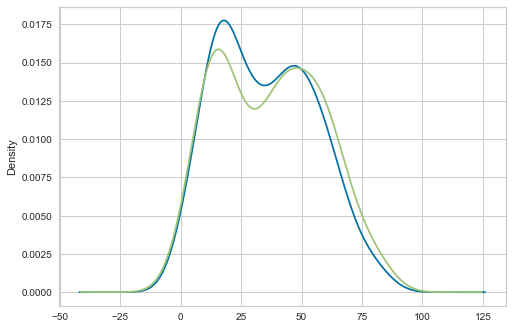

In [104]:
df.groupby('JENIS KELAMIN').Umur.plot(kind='kde')

In [105]:
def viz_L(var):
    subset=df[df["JENIS KELAMIN"] == "L"]
    
    counts = subset[var].value_counts().sort_values(ascending=False)

    ax = counts.plot.barh()
    ax.set_title("Visualisation based on " + var + " on male population")

    # Add labels to the bars
    for i, v in enumerate(counts):
        ax.text(v + 0.2, i, str(v), color='blue', fontweight='bold')

    plt.show()
    
    fig, ax = plt.subplots()
    ax.set_title("Visualisation based on " + var + " on male population")

    # Create the pie chart
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')

    plt.show()
    
#     t=subset.groupby([var]).size()

#     (((t/df.groupby([var]).size())*100).sort_values(ascending=False)).plot.barh()
#     plt.title("Percentage of transaction out of all transaction based on "+ var)
#     plt.show()

In [106]:
def viz_P(var):
    subset=df[df["JENIS KELAMIN"] == "P"]
    
    counts = subset[var].value_counts().sort_values(ascending=False)

    ax = counts.plot.barh()
    ax.set_title("Visualisation based on " + var + " on female population")

    # Add labels to the bars
    for i, v in enumerate(counts):
        ax.text(v + 0.2, i, str(v), color='blue', fontweight='bold')

    plt.show()
    
    fig, ax = plt.subplots()
    ax.set_title("Visualisation based on " + var + " on female population")

    # Create the pie chart
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')

    plt.show()
    
#     t=subset.groupby([var]).size()

#     (((t/df.groupby([var]).size())*100).sort_values(ascending=False)).plot.barh()
#     plt.title("Percentage of transaction out of all transaction based on "+ var)
#     plt.show()

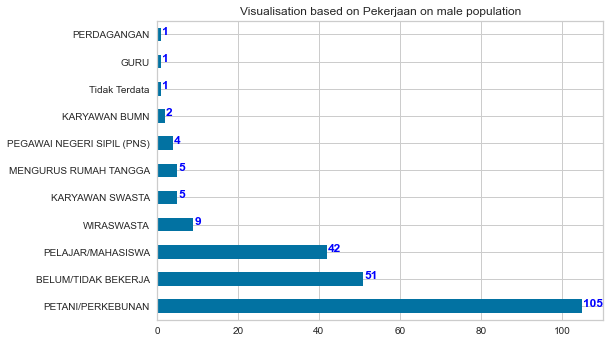

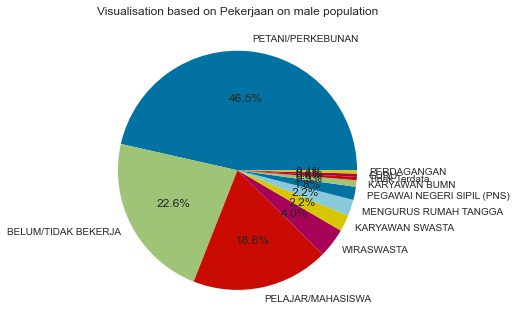

In [107]:
viz_L("Pekerjaan")

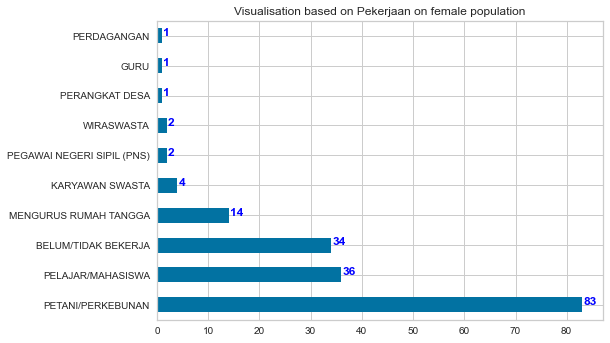

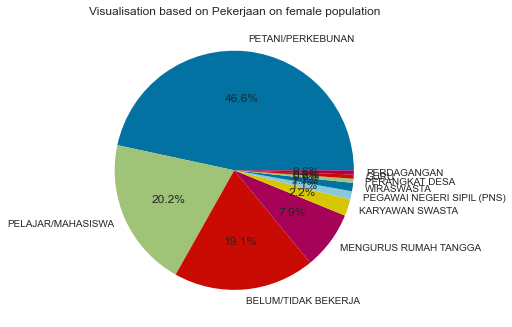

In [108]:
viz_P("Pekerjaan")

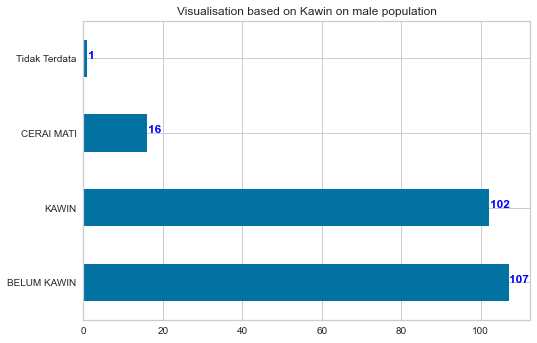

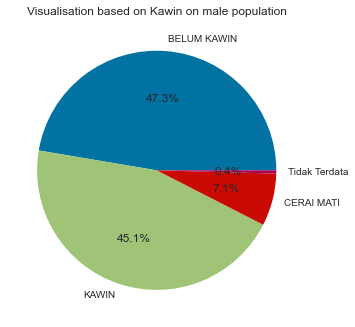

In [109]:
viz_L("Kawin")

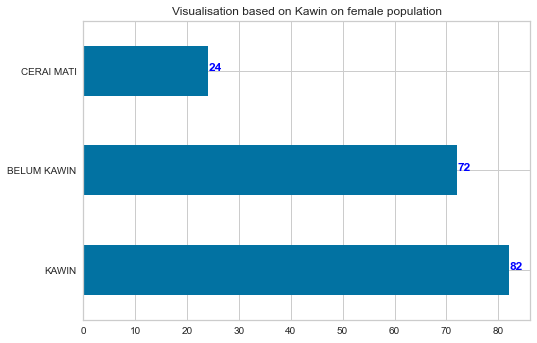

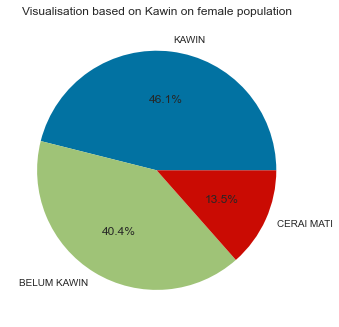

In [110]:
viz_P("Kawin")

In [114]:
df["Hub. Keluarga"].value_counts()

ANAK               171
KEPALA KELUARGA    135
ISTRI               89
CUCU                 6
PEMBANTU             1
ORANGTUA             1
MERTUA               1
Name: Hub. Keluarga, dtype: int64

In [112]:
df[df["JENIS KELAMIN"] == "L"]["Hub. Keluarga"].value_counts()

KEPALA KELUARGA    109
ANAK               101
ISTRI               11
CUCU                 5
Name: Hub. Keluarga, dtype: int64

In [113]:
df[df["JENIS KELAMIN"] == "P"]["Hub. Keluarga"].value_counts()

ISTRI              78
ANAK               70
KEPALA KELUARGA    26
MERTUA              1
ORANGTUA            1
PEMBANTU            1
CUCU                1
Name: Hub. Keluarga, dtype: int64

In [115]:
df["Status"].value_counts()

Tetap    404
Name: Status, dtype: int64